In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [42]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape)  # (60000, 28, 28) (10000, 28, 28) : (이미지갯수, 28x28 픽셀, 컬러축이 없으므로 흑백이미지)
print(y_train.shape, y_test.shape)  # (60000,) (10000,)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [43]:
print(type(y_train))
y_train[:10]

<class 'numpy.ndarray'>


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [44]:
# ndarray이므로 value counts 를 쓰기 위해 series로 변경
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

[29502  6705 58102 34469 44733 29737 40827 52608 12856 35866  1428 23464
 58936 28875 34179 14368]


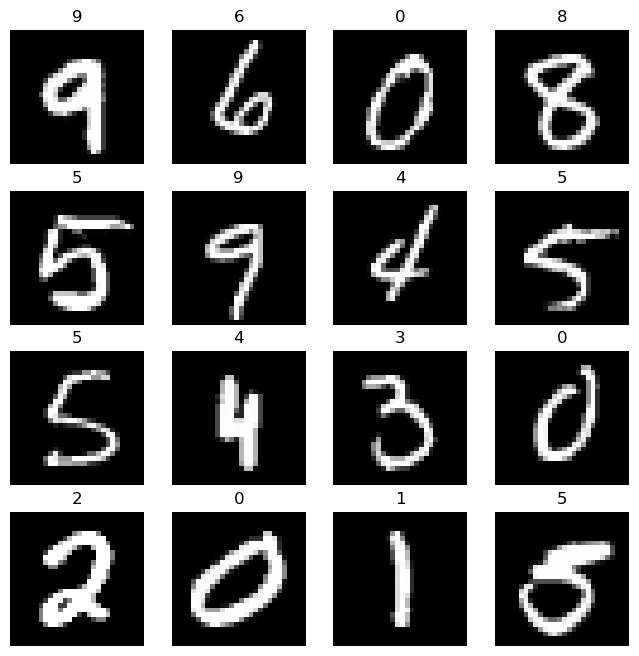

In [45]:
samples = np.random.randint(60000, size = 16)
print(samples)

plt.figure(figsize = (8, 8))    # size는 inch
for i, idx in enumerate(samples):
    plt.subplot(4, 4, i+1)      # matplotlib의 첫번째는 1
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(y_train[idx])
plt.show()

### Split validation data

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)
(42000,) (18000,) (10000,)


### Normalization

In [47]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

In [48]:
np.max(X_train_s), np.min(X_train_s)

(1.0, 0.0)

### Label(Target) one-hot Encoding

In [49]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

print(y_train_o[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Flatten

In [50]:
X_train_s = X_train_s.reshape(-1, 28*28)
X_val_s = X_val_s.reshape(-1, 28*28)

print(X_train_s.shape, X_val_s.shape)

(42000, 784) (18000, 784)


### Model

In [51]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units = 64, activation = 'relu', input_shape = (28*28, )),     # input은 image size
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 10, activation='softmax')    # 출력 class가 10   
])

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train

In [53]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [54]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/10


1313/1313 [==============================] - 2s 1ms/step - loss: 0.3936 - accuracy: 0.8854 - val_loss: 0.2562 - val_accuracy: 0.9245
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1750 - accuracy: 0.9496 - val_loss: 0.1667 - val_accuracy: 0.9528
Epoch 3/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1301 - accuracy: 0.9610 - val_loss: 0.1577 - val_accuracy: 0.9537
Epoch 4/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0999 - accuracy: 0.9701 - val_loss: 0.1402 - val_accuracy: 0.9584
Epoch 5/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0816 - accuracy: 0.9743 - val_loss: 0.1191 - val_accuracy: 0.9648
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.1170 - val_accuracy: 0.9665
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0567 - accuracy: 0.9823 - val_loss: 0.1285 - val_accuracy: 0.9622
Epo

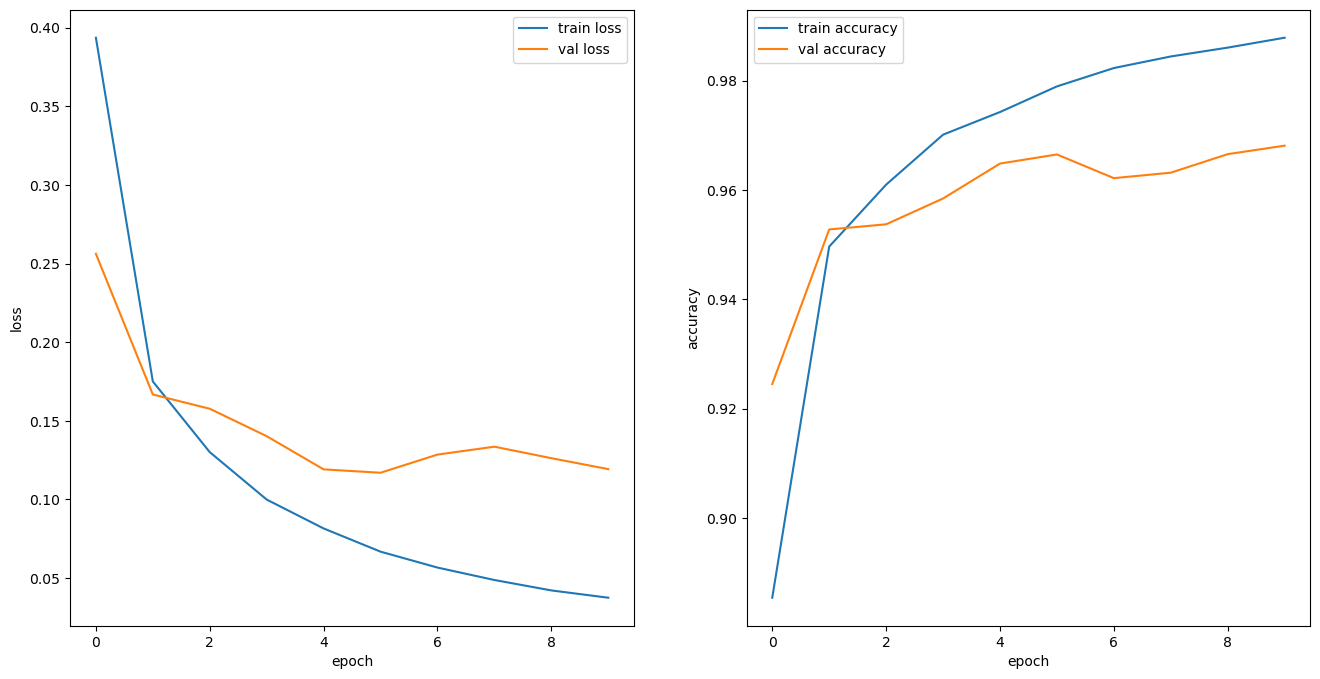

In [56]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

plot_history(history)

### Eval

- test data scaling, reshape
- one hot encoding

In [57]:
X_test_s = X_test.astype('float32')/255.
y_test_o = to_categorical(y_test)

In [59]:
np.max(X_test_s), np.min(X_test_s)

(1.0, 0.0)

In [60]:
y_test_o[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
print(X_test_s.shape)
X_test_s = X_test_s.reshape(-1, 28*28)
print(X_test_s.shape)

(10000, 28, 28)
(10000, 784)


### Pred

In [63]:
y_pred = model.predict(X_test_s)
y_pred[:5]

313/313 [==============================] - 0s 786us/step


array([[2.1334154e-09, 5.9820827e-08, 1.5269658e-08, 1.0751028e-06,
        3.9344087e-08, 5.4848833e-08, 2.0540876e-11, 9.9994302e-01,
        1.6923640e-07, 5.5531513e-05],
       [1.6750935e-08, 1.4112774e-05, 9.9997342e-01, 1.2332141e-05,
        5.8497436e-11, 3.4901199e-10, 1.9609223e-10, 1.0277478e-09,
        6.8867124e-08, 1.8132603e-09],
       [4.5305815e-06, 9.9976891e-01, 3.6943291e-07, 1.4795211e-06,
        6.7386121e-05, 1.1019787e-04, 2.0959988e-07, 1.2801250e-05,
        2.8803172e-05, 5.2808591e-06],
       [9.9940085e-01, 2.8871838e-07, 4.8711270e-04, 2.2013492e-06,
        4.0378382e-08, 1.6090932e-07, 6.6424705e-05, 1.9171903e-05,
        3.0076283e-06, 2.0789977e-05],
       [3.5465915e-11, 2.8981879e-07, 6.2878758e-10, 1.7243023e-07,
        9.9897194e-01, 8.7965169e-08, 2.0097944e-10, 1.5914136e-06,
        1.6081516e-06, 1.0242469e-03]], dtype=float32)

In [64]:
y_pred.shape

(10000, 10)

In [71]:
y_pred_max = np.argmax(y_pred, axis=1)
y_pred_max[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, y_pred_max))
print(f1_score(y_test, y_pred_max, average='macro'))

0.9694
0.9692418781407678


### Check Wrong

In [78]:
wrong_samples = np.where(y_test != y_pred_max)[0]
wrong_samples = np.random.choice(wrong_samples, size=9)

wrong_samples

array([3597, 5600, 3115, 4269, 1938, 2099,  115,  760, 9755], dtype=int64)

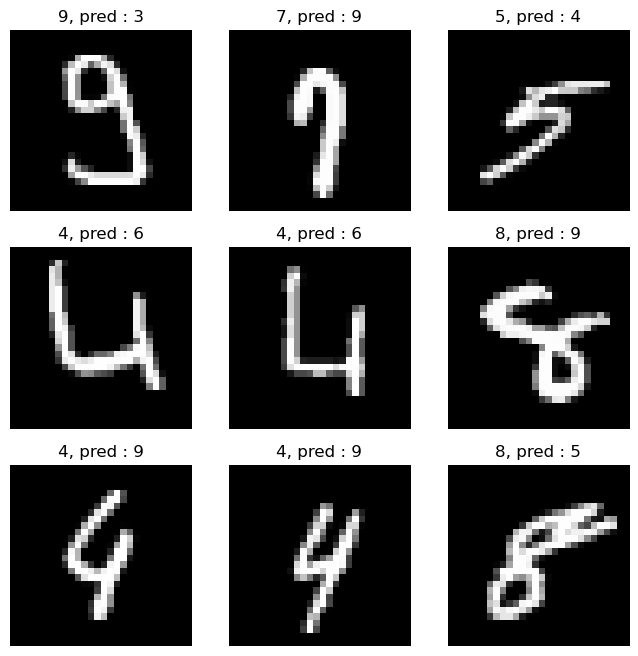

In [79]:
plt.figure(figsize = (8, 8))    # size는 inch
for i, idx in enumerate(wrong_samples):
    plt.subplot(3, 3, i+1)      # matplotlib의 첫번째는 1
    plt.imshow(X_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'{y_test[idx]}, pred : {y_pred_max[idx]}')
plt.show()

### Model Save

In [81]:
model.save('nn-mnist-28x28-97.keras')       # option 1(single file)

In [82]:
model.save('models')                        # option 2(make directory)

INFO:tensorflow:Assets written to: models\assets


INFO:tensorflow:Assets written to: models\assets


### Model Load

In [85]:
loaded_model = keras.models.load_model('nn-mnist-28x28-97.keras')

In [87]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
